In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
plt.style.use('seaborn')
#import the csv file generated from SAS by combining 10 dat file into one
data_dent=pd.read_csv(r'C:/MEPS/data.csv',sep=',')

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (25,27,33,36,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Find out the column with na >20000, drop them
tmp_colum = []
for col in data_dent:
    if (data_dent[col].isnull().values.sum())> 20000:
        tmp_colum.append(col)
data_dent_clean = data_dent.drop(tmp_colum,axis=1)       


In [3]:
#clean the data by select correct year and month
data_test = data_dent_clean[data_dent_clean["EVENT DATE - YEAR"].astype(int)>2000]
data_test = data_test[data_test["EVENT DATE - MONTH"].astype(int)>0]

In [4]:
#Create a function to do the data clean with value "Yes" and then perform the groupby date
#According to the manual of the data, the EXPENDITURE FILE PERSON WEIGHT should be used to summarize the dental visits
def get_true_type (df, variable_name):
    tmp_frame = df[df[variable_name] == "1 YES"]
    test= tmp_frame.groupby([(data_test["EVENT DATE - YEAR"]),(data_test["EVENT DATE - MONTH"])])['EXPENDITURE FILE PERSON WEIGHT'].agg(["sum"])
    return test

In [5]:
#input the name of treatment type
Dent_type = [
"ABSCESS OR INFECTION TREATMENT",
"BONDING, WHITENING, OR BLEACHING",
"BRIDGES",
"CLEANING, PROPHYLAXIS, OR POLISHING",
"CROWNS OR CAPS",
"DENTURES OR PARTIAL DENTURES",
"EXTRACTION, TOOTH PULLED",
"FILLINGS",
"FLUORIDE TREATMENT",
"GENERAL EXAM OR CONSULTATION",
"IMPLANTS",
"INLAYS",
"ORAL SURGERY",
"OTHER DENTAL PROCEDURES",
"OTHER DENTAL SPECIALIST SEEN",
"PERIODONTAL RECALL VISIT",
"PERIODONTAL SCALING, ROOT PLANING OR GUM",
"RECEIVED MEDICINE INCLUDING FREE SAMPLE",
"REPAIR OF BRIDGES/DENTURES OR RELINING",
"ROOT CANAL",
"SEALANT APPLICATION",
"TREATMENT FOR TMD OR TMJ",
"X-RAYS, RADIOGRAPHS OR BITEWINGS"]

In [6]:
#get the new list composed of generated dataframe
All_type = []
for treat in Dent_type:
    dent_tmp = get_true_type(data_test, treat)
    All_type.append(dent_tmp)

In [7]:
#Add a new column to the dataframe by adding the Year and Month together, the data was set to 1
All_type_flat = All_type
Date_with_type = []
for i in range(len(All_type)):
    tmp = All_type[i].reset_index()
    tmp["date"] = pd.to_datetime(10000*tmp["EVENT DATE - YEAR"] + 100*tmp["EVENT DATE - MONTH"] + 1, format = '%Y%m%d')
    Date_with_type.append(tmp)

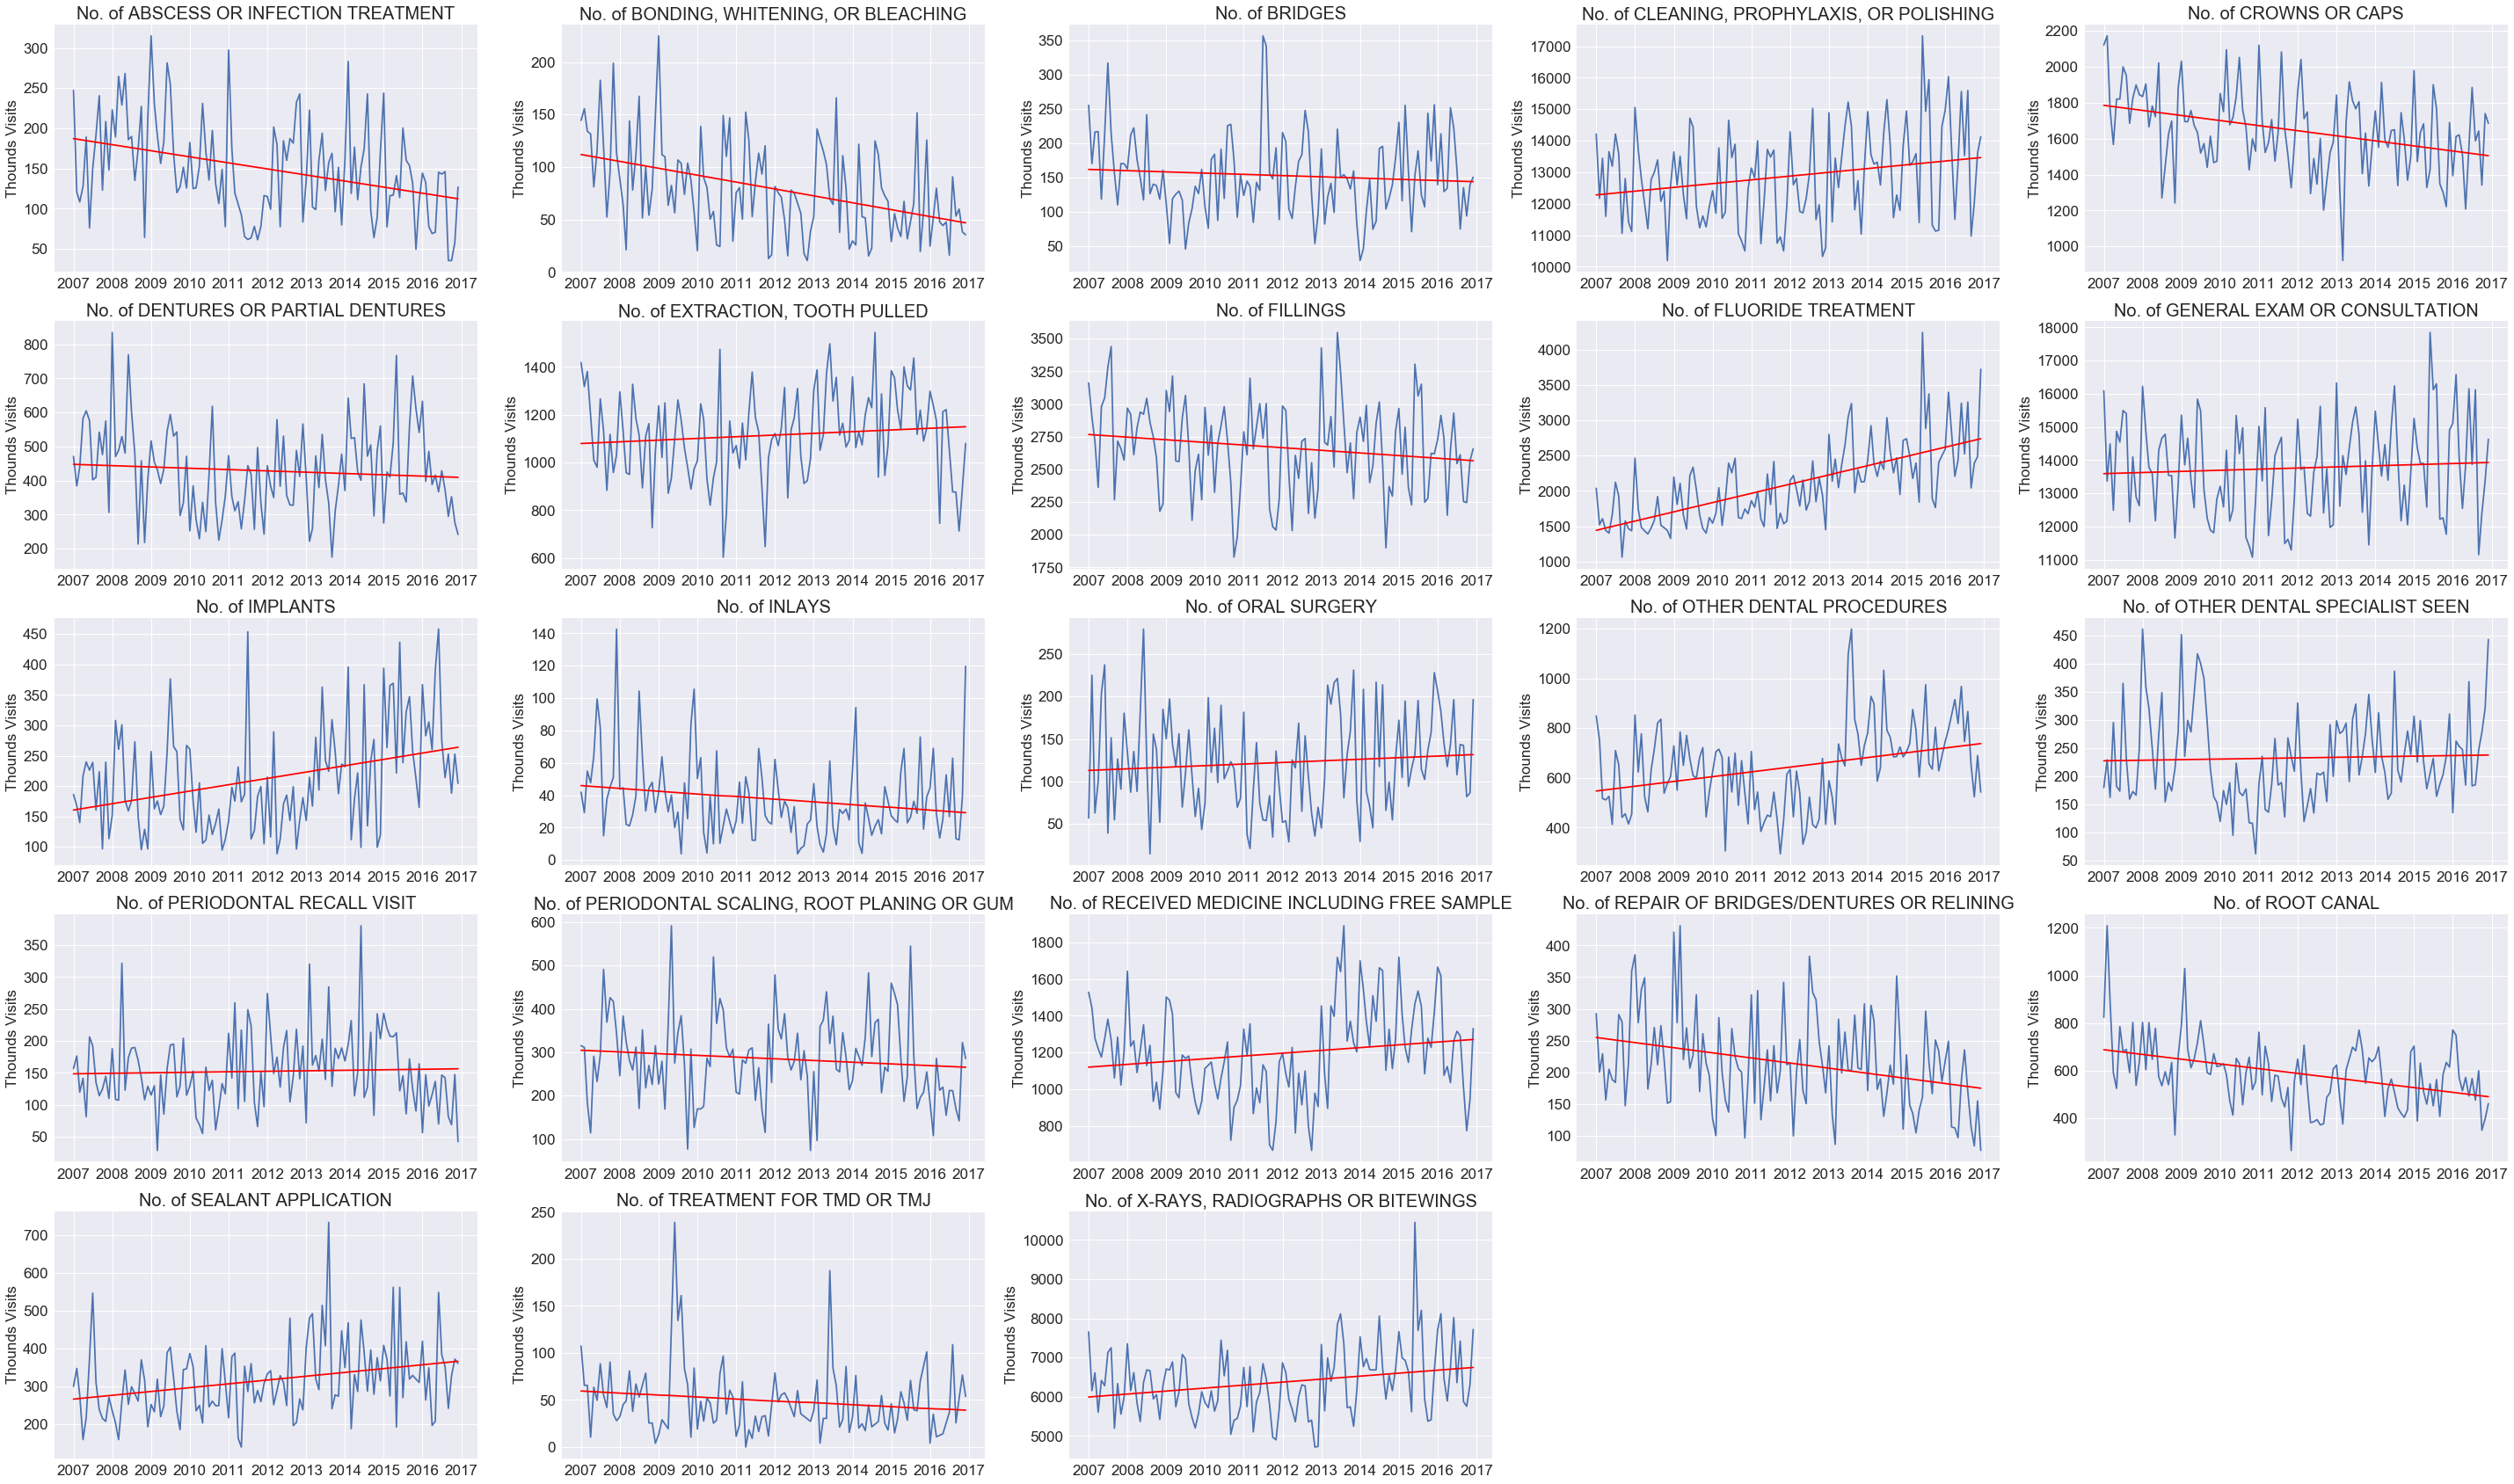

In [8]:
#create 23 figure showing the trend of certain type of treatment
fig = plt.figure(figsize=(50,30))
for i in range(len(Date_with_type)):
    y = Date_with_type[i]["sum"].values
    x = Date_with_type[i]["date"].values
    x1 = Date_with_type[i].index.values+1
    plt.subplot(5,5,(i+1))
    plt.plot(x, y/1000)
    b, m = polyfit(x1, y/1000, 1) #check the treand of the dental visit per treatment
    plt.plot(x, b + m * x1, '-r')
    plt.title("No. of {}".format(Dent_type[i]),fontsize=20)
    plt.xticks(fontsize = 17)
    plt.yticks(fontsize = 17)
    plt.ylabel("Thounds Visits", fontsize=17)